In [1]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from PIL.ImageColor import colormap
from scipy.stats import linregress
import libraries as lib

In [2]:
#20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 
#Piloot: 
#Teun van den Elzen (72kg) (11:0
#Tristan Ploeger (80kg) (13:30-2
#Tomas Kramer (70kg) (20:00- 

#20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Folder: 
#Folders zijn weer begonnen vanaf mapje 1 vanwege het vervangen van de sd-kaart. 
#0002: Gaat het water in <--- 
#0003: Na opnieuw opstarten. 
#Piloot: 
#Tristan Ploeger (80kg) 
#Jonathan Meuleman (70kg) 

#20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Piloot: 
#Ruben Jans (77kg) 
#Bastiaan Buurman (75kg) 

#20240714_Limburg-Nijmegen\0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 m/s 
#Piloot: 
#Felix van Beusekom (78kg) (10:20-14:40) 
#Dennis van den Berg (73kg) (14:40-~17:30) 
#Jonathan Gessel (76kg) (~17:30-21:20) 

In [3]:
directory1 = "../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"
directory2 = '../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240714_Limburg-Nijmegen/0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent'
directory3 = '../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone'
directory4 = '../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors'

result1 = lib.DataUitzoekenGui(directory1)
result2 = lib.DataUitzoekenGui(directory2)
result3 = lib.DataUitzoekenGui(directory3)
result4 = lib.DataUitzoekenGui(directory4)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_05.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_07.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [37]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df1 = result1['merged_df'].copy()
    #merged_df2 = result2['merged_df'].copy()
    #merged_df3 = result3['merged_df'].copy()
    #merged_df4 = result4['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")

In [38]:
merged_df1

,1_Datalogger port,"1_Dataloggertijd, in s","1_MPPT-tijd, in s","1_Paneel 1 ingangsspanning, in V","1_Paneel 1 ingangsstroom, in I","1_Paneel 1 instantaan ingangsvermogen, in W","1_Paneel 1 totale ingangsenergie, in J","1_Paneel 2 ingangsspanning, in V","1_Paneel 2 ingangsstroom, in I","1_Paneel 2 instantaan ingangsvermogen, in W",...,"5_Gps-latitude, in graden",5_GPS richting,"5_Gps-tijd, in s",5_Format header (>05|05),"5_Paneel 1 ingangsspanning, in V","5_Uitgangsspanning, in V","5_Kanaal 1 instantaan uitgangsvermogen, in W","5_Gps-snelheid, in km/u",5_Pirano 1,5_Pirano 2
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:17,2.0,137.432109,1200.551736,20.520091,1.222273,43.175000,1.403547e+04,21.182909,1.216727,44.403455,...,5020.2014,9.7,60340.800000,05|07,-0.050,-0.166683,0.001,0.0,200,221
0 days 00:02:18,2.0,137.993885,1201.113462,20.557133,1.220663,43.513612,1.404957e+04,21.081939,1.220235,44.595745,...,5020.2014,9.7,60341.408163,05|07,-0.052,-0.165728,0.001,0.0,200,221
0 days 00:02:19,2.0,138.999369,1202.118929,20.635529,1.217696,43.665510,1.407482e+04,20.999480,1.225176,44.707304,...,5020.2014,9.7,60342.349057,05|07,-0.051,-0.165576,0.001,0.0,200,221
0 days 00:02:20,2.0,140.000394,1203.119943,20.715600,1.212442,43.540411,1.409996e+04,21.150800,1.218021,44.659474,...,5020.2014,9.7,60343.277228,05|07,-0.051,-0.165597,0.001,0.0,200,221
0 days 00:02:21,2.0,140.999270,1204.118814,20.637881,1.217366,43.537604,1.412506e+04,21.080851,1.222149,44.650535,...,5020.2014,9.7,60344.207547,05|07,-0.050,-0.165157,0.001,0.0,201,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 14:39:31,2.0,52770.997042,53833.132747,-0.083859,-0.017313,0.002424,1.355884e+06,-0.082424,-0.017576,0.002323,...,5110.7016,286.3,204054.030612,05|07,-0.043,-0.143247,0.001,0.0,-7,-8
0 days 14:39:32,2.0,52772.000473,53834.136150,-0.083960,-0.017560,0.002490,1.355884e+06,-0.082430,-0.017490,0.002280,...,5110.7016,286.3,204055.000000,05|07,-0.044,-0.144925,0.001,0.0,-7,-8
0 days 14:39:33,2.0,52773.003900,53835.139566,-0.083919,-0.017273,0.002444,1.355884e+06,-0.082646,-0.017525,0.002333,...,5110.7016,286.3,204055.979167,05|07,-0.042,-0.145139,0.001,0.0,-7,-8


In [39]:
#merged_df1 filter alle snelheden boven de 100 km/u
merged_df1 = merged_df1[merged_df1['1_Gps-snelheid, in km/u'] < 100]

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Veronderstel dat 'merged_df' je dataframe is
# (vervang 'merged_df' door 'merged_df1' als je specifiek met 'merged_df1' werkt)

# Stap 1: Identificeer de kolommen voor paneelvermogens
def identificeer_paneelvermogens(df):
    paneel_power_cols = []
    pattern = r'^\d+_Paneel \d+ instantaan ingangsvermogen, in W$'
    for col in df.columns:
        if re.match(pattern, col):
            paneel_power_cols.append(col)
    return paneel_power_cols

paneel_power_cols = identificeer_paneelvermogens(merged_df1)

# Controleer welke kolommen zijn gevonden
print("Gevonden paneelvermogen kolommen:")
for col in paneel_power_cols:
    print(col)

Gevonden paneelvermogen kolommen:
1_Paneel 1 instantaan ingangsvermogen, in W
1_Paneel 2 instantaan ingangsvermogen, in W
2_Paneel 1 instantaan ingangsvermogen, in W
2_Paneel 2 instantaan ingangsvermogen, in W
3_Paneel 1 instantaan ingangsvermogen, in W
3_Paneel 2 instantaan ingangsvermogen, in W
4_Paneel 1 instantaan ingangsvermogen, in W
4_Paneel 2 instantaan ingangsvermogen, in W
5_Paneel 1 instantaan ingangsvermogen, in W
5_Paneel 2 instantaan ingangsvermogen, in W


In [43]:
# Bereken de totale output power door alle paneelvermogens op te tellen
merged_df1['Totale_MPPT_Output_W'] = merged_df1[paneel_power_cols].sum(axis=1)

In [44]:
# Aantal panelen is gelijk aan het aantal vermogen kolommen gevonden
aantal_panelen = len(paneel_power_cols)
oppervlakte_per_paneel = 0.5  # in m² (pas dit aan naar jouw situatie)
totale_oppervlakte = aantal_panelen * oppervlakte_per_paneel

In [45]:
def identificeer_pirano_kolommen(df):
    pirano_cols = []
    pattern = r'^\d+_Pirano \d+$'
    for col in df.columns:
        if re.match(pattern, col):
            pirano_cols.append(col)
    return pirano_cols

pirano_cols = identificeer_pirano_kolommen(merged_df1)

# Controleer welke kolommen zijn gevonden
print("Gevonden pyranometer kolommen:")
for col in pirano_cols:
    print(col)

# Bereken de gemiddelde irradiance
if len(pirano_cols) >= 2:
    merged_df1['Gemiddelde_Irradiance_W_per_m2'] = merged_df1[pirano_cols].mean(axis=1)
elif len(pirano_cols) == 1:
    merged_df1['Gemiddelde_Irradiance_W_per_m2'] = merged_df1[pirano_cols[0]]
else:
    print("Geen pyranometer data beschikbaar.")
    merged_df1['Gemiddelde_Irradiance_W_per_m2'] = np.nan

Gevonden pyranometer kolommen:
2_Pirano 1
2_Pirano 2
4_Pirano 2
4_Pirano 1
5_Pirano 1
5_Pirano 2


<ipython-input-45-e12e4c05b704>:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df1['Gemiddelde_Irradiance_W_per_m2'] = merged_df1[pirano_cols].mean(axis=1)


In [46]:
merged_df1['Totale_Incident_Power_W'] = merged_df1['Gemiddelde_Irradiance_W_per_m2'] * totale_oppervlakte

# Vermijd deling door nul
merged_df1['Totale_Incident_Power_W'].replace(0, np.nan, inplace=True)

In [47]:
merged_df1['Efficiëntie_perc'] = (
    merged_df1['Totale_MPPT_Output_W'] / merged_df1['Totale_Incident_Power_W']
) * 100

# Verwijder eventuele NaN-waarden
merged_df1.dropna(subset=['Efficiëntie_perc'], inplace=True)

In [51]:
#filter snelheden boven de 100km/u eruit
merged_df1 = merged_df1[merged_df1['1_Gps-snelheid, in km/u'] < 100]
#en effcienties boven de 200%
merged_df1 = merged_df1[merged_df1['Efficiëntie_perc'] < 200]
merged_df1 = merged_df1[merged_df1['Efficiëntie_perc'] > -200]

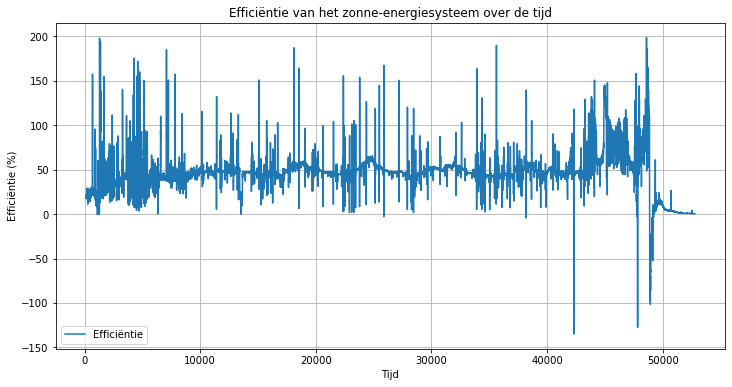

In [54]:
# Efficiëntie over de tijd plotten
plt.figure(figsize=(12, 6))
plt.plot(merged_df1['1_Dataloggertijd, in s'], merged_df1['Efficiëntie_perc'], label='Efficiëntie')
plt.title('Efficiëntie van het zonne-energiesysteem over de tijd')
plt.xlabel('Tijd')
plt.ylabel('Efficiëntie (%)')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
#sorteer de data op tijd
merged_df1.sort_values(by='1_Dataloggertijd, in s', inplace=True)


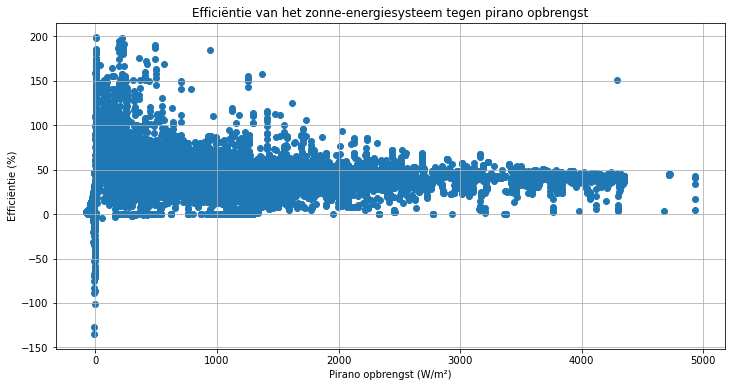

In [58]:
#plot efficiëntie tegen pirano opbrengst
plt.figure(figsize=(12, 6))
plt.scatter(merged_df1['Totale_Incident_Power_W'], merged_df1['Efficiëntie_perc'])
plt.title('Efficiëntie van het zonne-energiesysteem tegen pirano opbrengst')
plt.xlabel('Pirano opbrengst (W/m²)')
plt.ylabel('Efficiëntie (%)')
plt.grid(True)
plt.show()

In [61]:
#filter prirano meter hoger dan 2000 eruit
merged_df1 = merged_df1[merged_df1['Totale_Incident_Power_W'] < 2000]

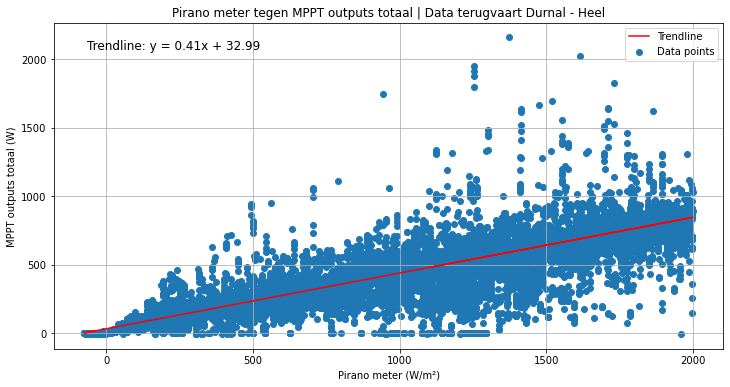

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Plot prirano meter tegen mppt outputs totaal
plt.figure(figsize=(12, 6))
plt.scatter(merged_df1['Totale_Incident_Power_W'], merged_df1['Totale_MPPT_Output_W'], label='Data points')

# Calculate the linear trendline
slope, intercept = np.polyfit(merged_df1['Totale_Incident_Power_W'], merged_df1['Totale_MPPT_Output_W'], 1)
trendline = slope * merged_df1['Totale_Incident_Power_W'] + intercept

# Plot the trendline
plt.plot(merged_df1['Totale_Incident_Power_W'], trendline, color='red', label='Trendline')

# Add titles and labels
plt.title('Pirano meter tegen MPPT outputs totaal | Data terugvaart Durnal - Heel')
plt.xlabel('Pirano meter (W/m²)')
plt.ylabel('MPPT outputs totaal (W)')
plt.legend()
plt.grid(True)

# Add the trendline formula as text annotation
formula = f'Trendline: y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.95, formula, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()